# Analysis and Visualisation

Setting up the notebook:

In [1]:
import pandas as pd
# Auxiliary classes:
from dataframeinfo import DataFrameInfo
from datatransform import DataTransform
from plotter import Plotter

In [2]:
# Importing the transformed data into dataframes
df = pd.read_csv('loan_payments_versions/loan_payments_post_null_imputation.csv', index_col='id') # Pre normalised dataframe.
normalised_df = pd.read_csv('loan_payments_versions/loan_payments_transformed.csv', index_col='id') # Normalised dataframe, adjusted for skewness.

In [3]:
# Instantiating classes:
transform = DataTransform()
query = DataFrameInfo()
visual = Plotter()

In [4]:
# change string to date formats.
transform.convert_string_to_date(df, 'last_payment_date')
transform.convert_string_to_date(df, 'issue_date')

transform.convert_string_to_date(normalised_df, 'last_payment_date')
transform.convert_string_to_date(normalised_df, 'issue_date')

,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,grade,sub_grade,employment_length,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type
id,,,,,,,,,,,,,,,,,,,,,
38676116,41461848,68.067212,66.565166,118.808946,36 months,7.49,16.250751,A,A4,5 years,...,10.850112,0.000000,0.0,0.0,2022-01,4.910558,2022-01,0.0,1,INDIVIDUAL
38656203,41440010,82.085127,80.149927,148.884050,36 months,6.99,19.755786,A,A3,9 years,...,12.088465,0.000000,0.0,0.0,2022-01,5.293713,2022-01,0.0,1,INDIVIDUAL
38656154,41439961,88.179753,86.049411,162.331777,36 months,7.49,21.350928,A,A4,8 years,...,12.224171,0.000000,0.0,0.0,2021-10,7.763081,2021-10,0.0,1,INDIVIDUAL
38656128,41439934,86.087783,84.024855,157.691853,36 months,14.31,21.634827,C,C4,1 year,...,12.645854,0.000000,0.0,0.0,2021-06,7.815112,2021-06,0.0,1,INDIVIDUAL
38656121,41439927,86.087783,84.024855,157.691853,36 months,6.03,20.649468,A,A1,10+ years,...,12.023592,0.000000,0.0,0.0,2022-01,5.380851,2022-01,0.0,1,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123133,114358,76.816336,75.046627,49.506797,36 months,15.96,19.385623,F,F4,3 years,...,13.060826,0.000000,0.0,0.0,2014-05,5.256468,2022-01,0.0,1,INDIVIDUAL
185352,105254,61.087643,59.792091,33.294108,36 months,9.64,14.650247,B,B4,1 year,...,12.598878,0.000000,0.0,0.0,2016-12,4.712596,2016-12,0.0,1,INDIVIDUAL
122637,104675,52.402165,51.353725,56.261087,36 months,7.75,12.241127,A,A3,1 year,...,10.759931,0.000000,0.0,0.0,2016-09,4.371804,2016-08,0.0,1,INDIVIDUAL


### Current State of Loans

To understand the current state of the payments, the percentage of the loans that are recovered against the investor funding and the total amount funded can be visualised. Since this data is categorical a bar chart will be appropriate to understand the percentage recovered against each funding.

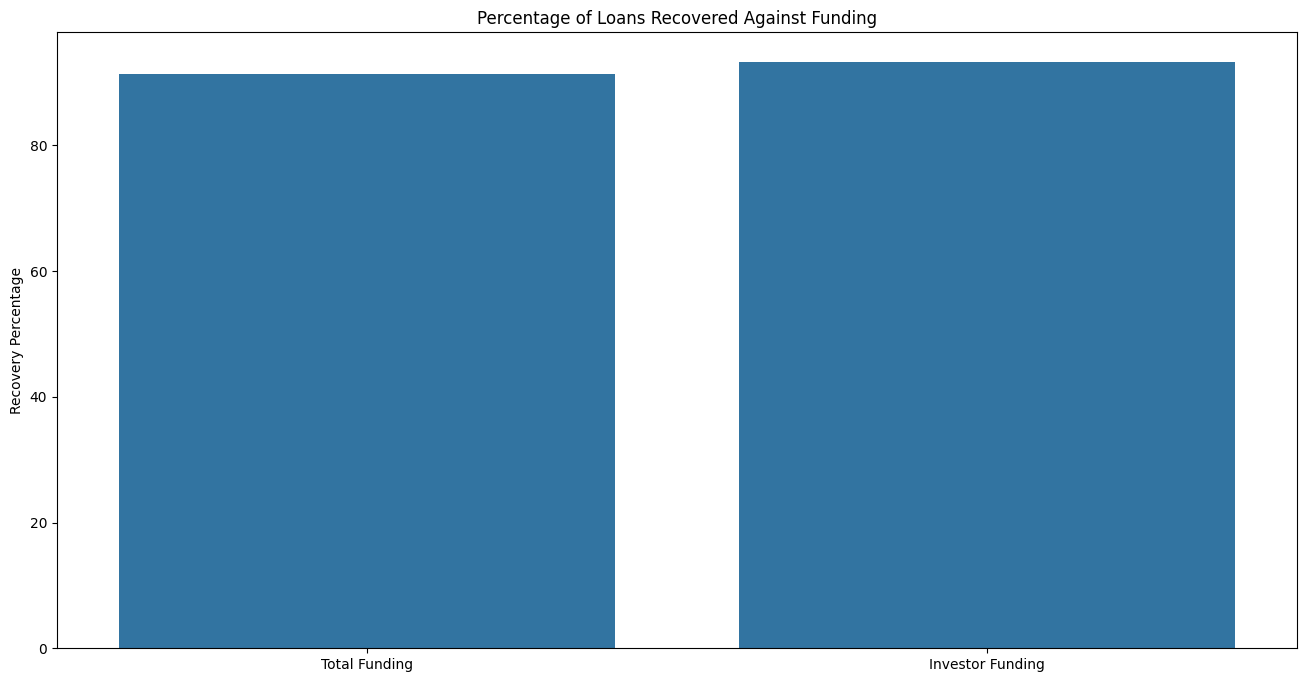

In [5]:
# Calculate the overall percentage of recovery against total and investor funding.
total_recovery_percentage = query.calculate_column_percentage(df, 'total_payment', 'funded_amount')
total_recovery_percentage_inv = query.calculate_column_percentage(df, 'total_payment', 'funded_amount_inv')

# Visualize the results using a bar plot.
categories = ['Total Funding', 'Investor Funding']
variables = [total_recovery_percentage, total_recovery_percentage_inv]
visual.bar_chart(independant_categories=categories, dependant_variables=variables, title='Percentage of Loans Recovered Against Funding', y_label='Recovery Percentage')

From the bar chart it can be seen that around 90 % of the total funds and investor contributed funds have been recovered. This suggests there is some challenges in repayments and recoveries. To further understand the relationship of recoveries between total and investor funded amounts, a pie chart can be used to provide a more comparative insight.

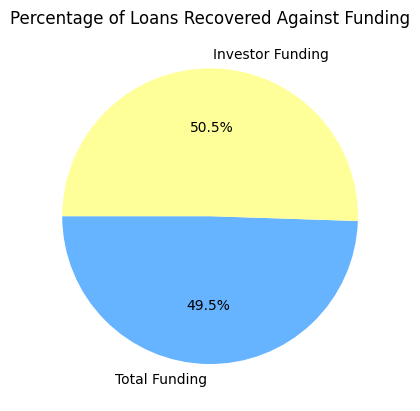

In [6]:
# Visualise the results using a pie chart.
visual.pie_chart(labels=categories, sizes=variables, title='Percentage of Loans Recovered Against Funding')

From this pie chart it can be seen that proportion of investor funding and total funding that has been recovered is almost equal. Now we can try to determine what the percentage of the total amount recovered would be up to 6 months' in the future.

In [7]:
collection_projections = query.calculate_total_collections_over_period(df, period=6) # Obtain the collection amount, loan amount and outstanding loan for the 6 month period in a dictionary.

total_collections = collection_projections['total_collections'] # Extract total collection amount from dictionary.
total_loan = collection_projections['total_loan'] # Extract total loan amount from dictionary.
total_loan_outstanding = collection_projections['total_loan_outstanding'] # Extract total loan amount outstanding from dictionary.

collections_percent = query.calculate_percentage(total_collections, total_loan) # calculate collections over total loan for 6 months as a percentage. 
print(f'The collections over the next 6 months are equivelant to {round(total_collections,2)}\nThis is {round(collections_percent,1)}% of the total loan amount.')

The collections over the next 6 months are equivelant to 96059626.11
This is 17.6% of the total loan amount.


Around 18 % of all loans will be recovered by collections over the next 6 months. However this does not account for the fact that part of these loan amounts have been paid so next we will also explore the proportion of outstanding loan amounts that will be recovered. We can show this data in a pie chart to visualise the percentage of loans collected.

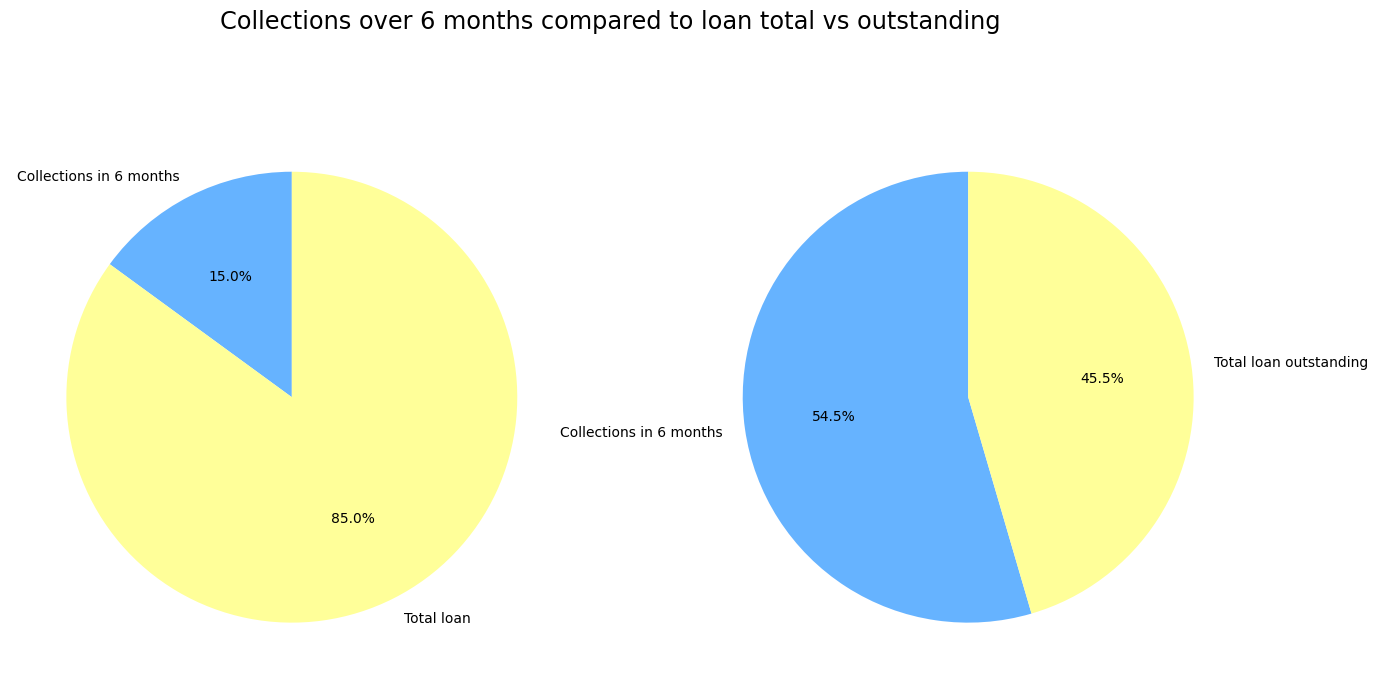

In [8]:
# Setting variables for pie chart.
sizes_1 = [total_collections, total_loan]
sizes_2 = [total_collections, total_loan_outstanding]
# Setting labels for pie chart.
labels_1 = ['Collections in 6 months', 'Total loan']
labels_2 = ['Collections in 6 months', 'Total loan outstanding']
# Generating two pie charts to compare collections by total loan and outstanding loan.
visual.two_pie_charts(sizes_1=sizes_1, labels_1=labels_1, sizes_2=sizes_2, labels_2=labels_2, plot_title='Collections over 6 months compared to loan total vs outstanding')

The first pie chart compares the projected collections to the size of the total current loans. Total current loan values are around 5.7 times greater than total collections over the next 6 months. From the second pie chart it can be seen that if you account for outstanding loan amounts rather than total loan amounts, over the next 6 months collections will cover all of the outstanding loan amounts and is infact around 1.2 times larger than outstanding loans.

Next we can look even further at how these collection projections look over each month in the 6 month period. This can be shown with a bar chart.

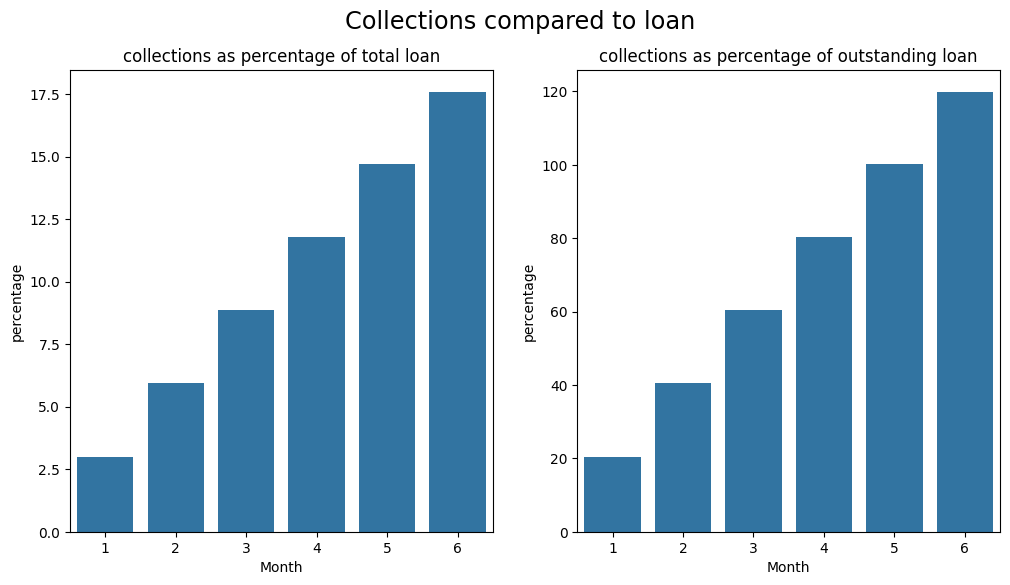

In [9]:
projected_percentages_dictionary = query.monthly_collection_percentage_projections(df, 6)

# Setting up bar chart plot parameters.
categories = [1,2,3,4,5,6] # identifying categories in terms of months of projection.
variables_1 = projected_percentages_dictionary['total_loan_percent'] # defining percentage variables for first bar chart by extracting first dictionary list.
variables_2 = projected_percentages_dictionary['outstanding_loan_percent'] # defining percentage variables for second bar chart by extracting second dictionary list.
title_1 = 'collections as percentage of total loan'
title_2 = 'collections as percentage of outstanding loan'
y_label = 'percentage'
x_label ='Month'

# Generating plot:
visual.two_bar_charts(independant_categories_1=categories, dependant_variables_1=variables_1, independant_categories_2=categories, dependant_variables_2=variables_2,
                     plot_title='Collections compared to loan', title_1=title_1, title_2=title_2, y_label_1=y_label, y_label_2=y_label, x_label_1=x_label, x_label_2=x_label)

These bar charts show a linear growth in total repayments collected, since it assumes constant monthly instalments. each month the proportion of collections over total loan amouts grows by around 3 % each month and in terms of outstanding loan amounts, the proportion of collections over total outstanding loan grows by around 20 % each month, reaching just under 120 % by the 6th month.

### Calculating Loss

To review 'Charged Off' loans will help gain a better understanding of loss to the company. A pie chart can be used to understand how many of the loans are 'Charged Off'.

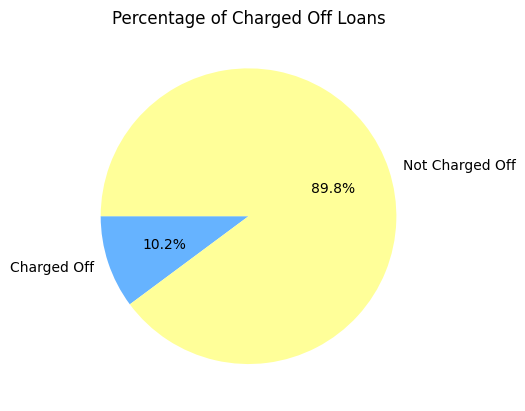

In [10]:
number_of_charge_offs = query.count_value_in_column(df, 'loan_status', 'Charged Off') # Total number of loans that were 'Charged Off'.
charge_off_percentage = query.calculate_percentage(number_of_charge_offs, len(df)) # Percentage of total loans that were 'Charged Off'.

# Generate plot comparing number of charged off to non charged off loans.
visual.pie_chart(labels=['Charged Off', 'Not Charged Off'], sizes=[charge_off_percentage, 100 - charge_off_percentage], title='Percentage of Charged Off Loans')

The pie chart shows that 1 in every 10 loans issues is charged off. We can also take a look at what is paid towards these loans before they are charged off.

The total value of all charged off loans is 74641603.28.
A total of 37282284.32 was paid before these loans were charged off.
This means the company recieved 49.9 % of funds for 'Charged Off' loans.


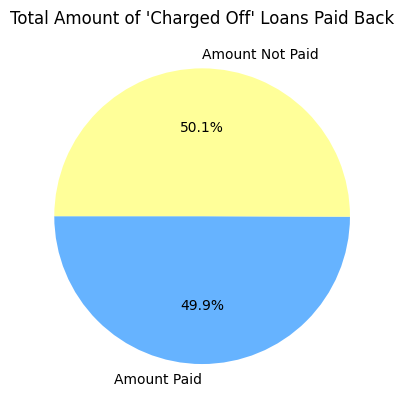

In [11]:
funded_amounts_charged_off = df[df['loan_status']=='Charged Off']['funded_amount'].sum() # Total amount paid out in 'Charged Off' loans.
total_payment_charged_off = df[df['loan_status']=='Charged Off']['total_payment'].sum() # Total amount paid towards loan by customers before they were 'Charged Off'.
percent_paid_charged_off = query.calculate_percentage(total_payment_charged_off, funded_amounts_charged_off)

print(f"The total value of all charged off loans is {round(funded_amounts_charged_off,2)}.\nA total of {round(total_payment_charged_off,2)} was paid before these loans were charged off.")
print(f"This means the company recieved {round(percent_paid_charged_off,1)} % of funds for 'Charged Off' loans.")

# Generating pie chart to visualise data
visual.pie_chart(labels=['Amount Paid', 'Amount Not Paid'], sizes=[percent_paid_charged_off, 100-percent_paid_charged_off], title="Total Amount of 'Charged Off' Loans Paid Back")

Here we can see roughly of half the funds given for these loans was actually paid before they were 'Charged Off'. A total of *37,282,284.32* was paid towards these loans.

### Projected Loss

To project the losses first we have to look at how much revenue each 'Charged Off' loan would have generated. Then we much consider how much total projected revenue was lost. This can be visualised in a bar chart amongst other variables such as the Total Revenue from loan payments, Total value of loans issued and total revenue from payments made before the loans were 'Charged Off'.

C:\Users\joels\AppData\Local\Temp\ipykernel_16256\651071052.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charged_off_df['projected_loss'] = total_loan_amount - charged_off_df['total_payment'] # Calculating the projected loss for each 'Charged Off' loan.


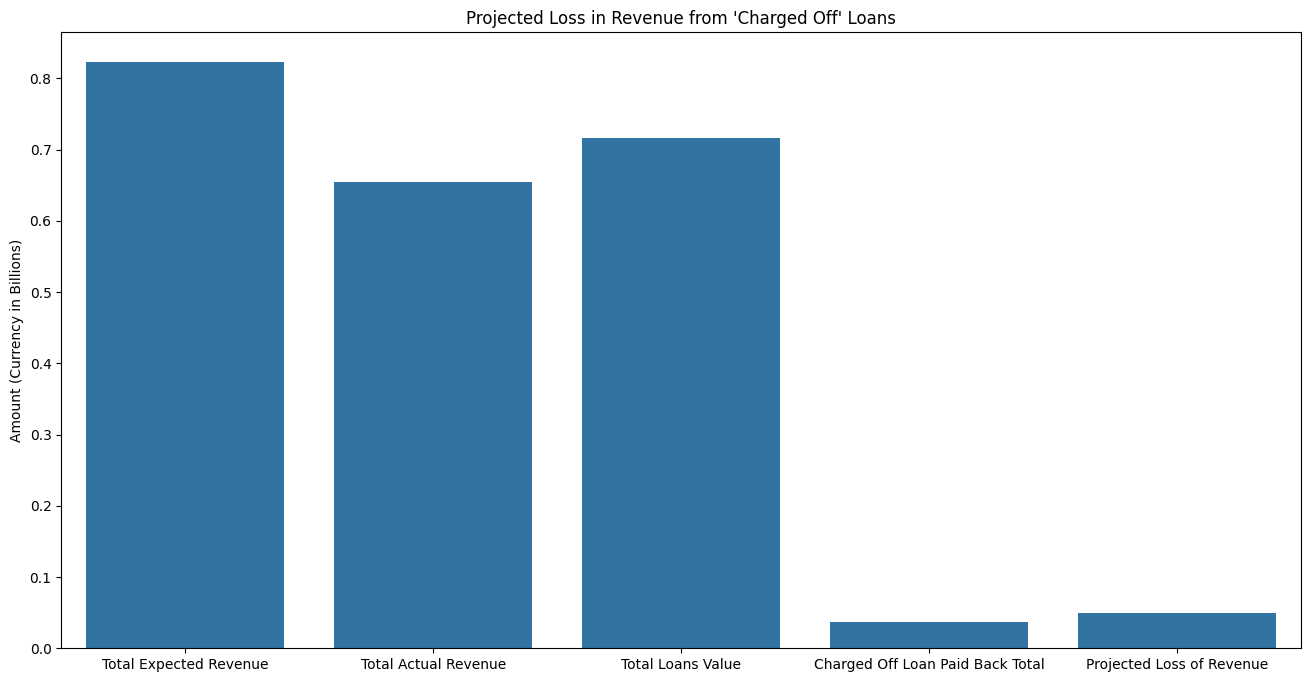

In [12]:
charged_off_df = df[df['loan_status']=='Charged Off'] # Filtering out non 'Charged Off' loans.
total_loan_amount = charged_off_df['funded_amount'] + (charged_off_df['funded_amount'] * (charged_off_df['int_rate']) * 0.01) # Total amount owed by customer, accounting for interest.
charged_off_df['projected_loss'] = total_loan_amount - charged_off_df['total_payment'] # Calculating the projected loss for each 'Charged Off' loan.
projected_loss = charged_off_df['projected_loss'].sum() # Calculating total loss of revenue for 'Charged Off' loans.

# Generating bar chart to visualise loss.
categories = ['Total Expected Revenue', 'Total Actual Revenue', 'Total Loans Value', 'Charged Off Loan Paid Back Total', 'Projected Loss of Revenue']
total_expected_revenue = (df['loan_amount'] * (1 + (df['int_rate'] * 0.01))).sum() # Convert interest rate to decimal and factor that into loan_amount
total_actual_revenue = df['total_payment'].sum()
loans_total = df['funded_amount'].sum()
data = [total_expected_revenue/1000000000, total_actual_revenue/1000000000, loans_total/1000000000, total_payment_charged_off/1000000000, projected_loss/1000000000] # Categorical variables divided by 1,000,000,000.

visual.bar_chart(independant_categories=categories, dependant_variables=data, title="Projected Loss in Revenue from 'Charged Off' Loans", y_label='Amount (Currency in Billions)')

As we can see the projected loss of revenue was greater than the actual revenue made on 'charged Off' loans, part of this may be due to the interest. This was a relatively small portion of the overall revenue the company has made. We can also see that the actual revenue the company expects to make is smaller than the expected revenue, in fact it is even smaller than the value of loans funded, so there is significant loss.

Next we can try to project the revenue that would be made for each monthly instalment of 'Charged Off' loans had they been paid off. The following bar chart shows a cumulative plot of cumulative revenue lost per month for 'charged off' loans if they had been continued being paid off.

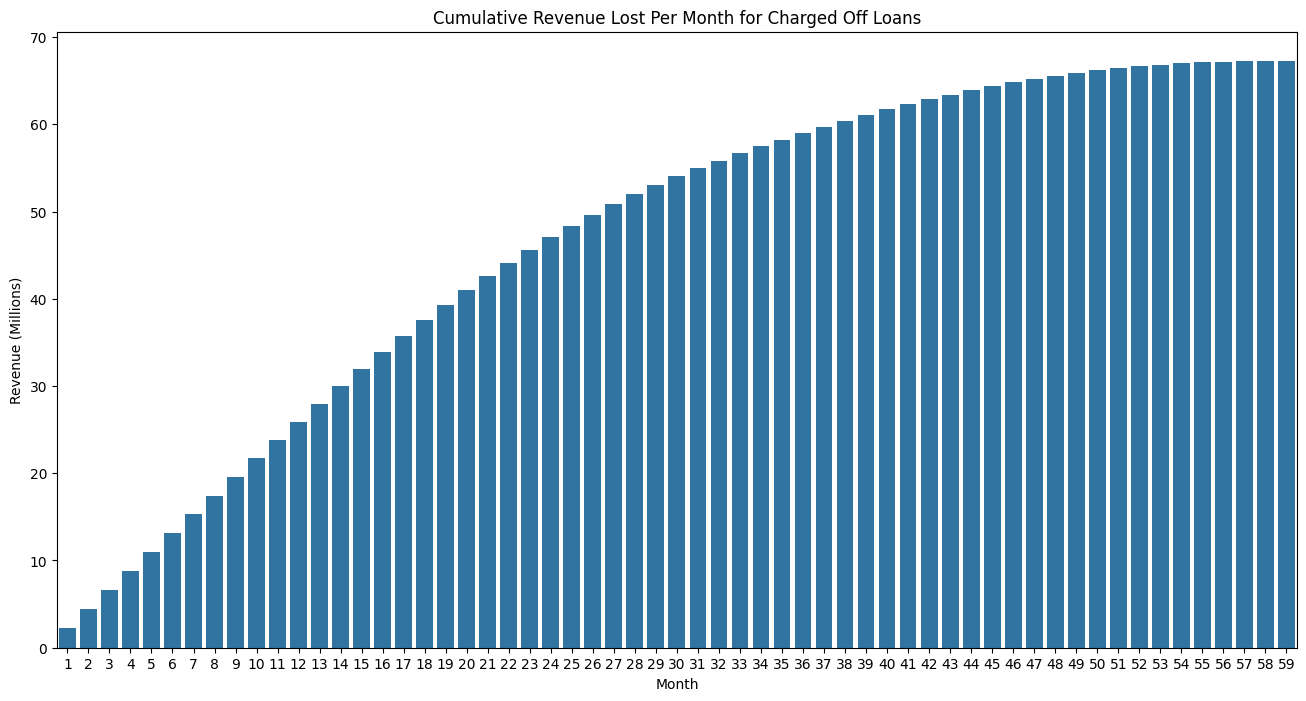

In [13]:
revenue_lost = query.revenue_lost_by_month(charged_off_df) # Calculating cumulative revenue lost for each month in a list.
revenue_lost = [revenue/1000000 for revenue in revenue_lost] # Scaling the revenue values down.
# Visualising cumulative projected revenue lost for each month instalments are paid:
visual.bar_chart(independant_categories=list(range(1, len(revenue_lost)+1)), dependant_variables=revenue_lost, title='Cumulative Revenue Lost Per Month for Charged Off Loans', y_label='Revenue (Millions)', x_label='Month')

From this visualisation it can be seen that the revenue lost each month decreases, causing the the growth in cumulative revenue lost to slow down. This is because each month there will be loans that complete their term, meaning less loans in total that need to be paid back with each month that passes. The total revenue lost after 59 months is just under 70 million.

### Possible Loss

Any loan with a 'loan_status' of *'Late (31-120 days)', 'In Grace Period'* or *'Late (16-30 days)'* can be considered a 'Risky' loan. To understand possible risk of loss, first we must consider how many of the total loans fall in this bracket as well as what percentage of all and current loans these 'Risky' loans consist of. This can be visualised with a pie chart.

There are 951 'Risky' loans.


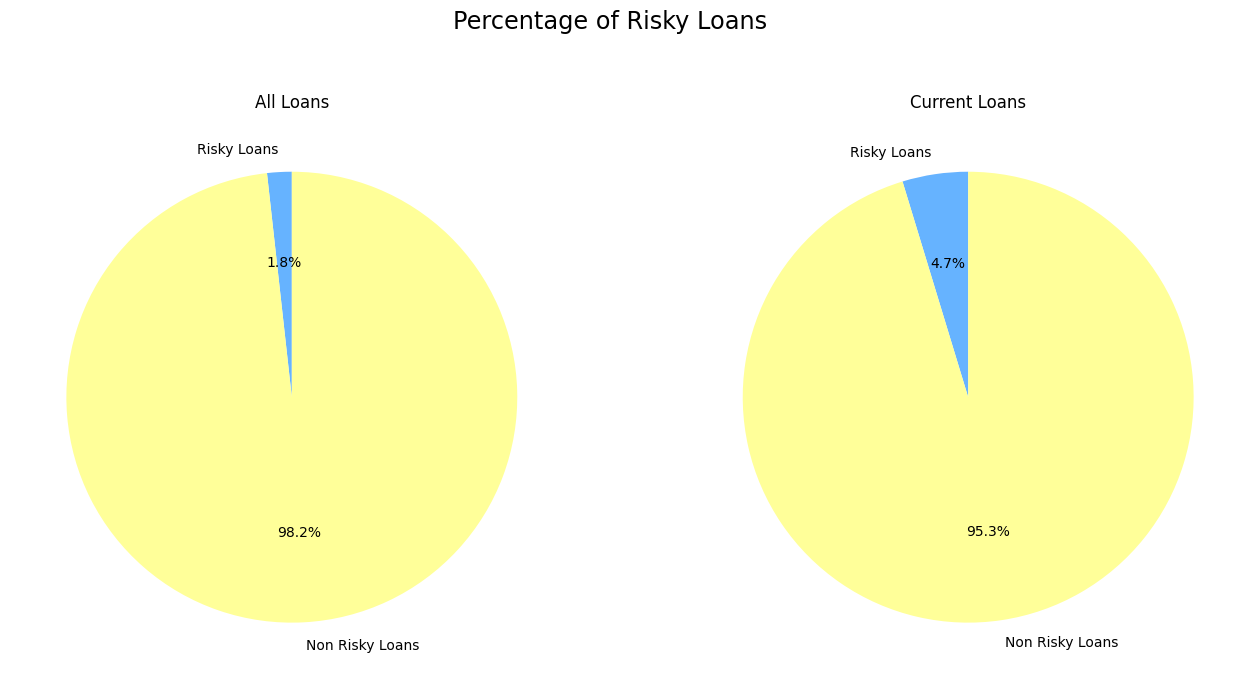

In [14]:
risky_status = ['Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)'] # All the risky loan status.
risky_df = df[df['loan_status'].isin(risky_status)] # A dataframe that contains only loans deemed as risky status.
current_df = df[df['loan_status'].isin(['Current','Late (31-120 days)','In Grace Period', 'Late (16-30 days)'])] # A mask for all current loans in dataframe.

risky_customers_sum = len(risky_df) # Returns the number of risky loans.

percentage_of_risky_loans = query.calculate_percentage(risky_customers_sum, len(df)) # Percentage of risky loans out of all loans.
percentage_of_current_risky_loans = query.calculate_percentage(risky_customers_sum, len(current_df)) # Percentage of risky loans out of all current loans.

print(f"There are {risky_customers_sum} 'Risky' loans.")

# Generating pie chart visualisation of risky loan percentage out of 1) All loans 2) Current loans:
visual.two_pie_charts(labels_1=['Risky Loans', 'Non Risky Loans'], labels_2=['Risky Loans', 'Non Risky Loans'], sizes_1=[percentage_of_risky_loans, 100-percentage_of_risky_loans],
                    sizes_2=[percentage_of_current_risky_loans, 100-percentage_of_current_risky_loans], title_1='All Loans', title_2='Current Loans', plot_title='Percentage of Risky Loans') 

There are 951 'Risky' loans, and as we can see, they only represent roughly 2 % of all loans but represent roughly 5 % of all currently active loans. These should be considered further to understand the potential loss that can be incurred. To understand this the total revenue that would be lost must be projected if all risky loans became 'Charged Off'. This should then be visualised in a pie chart as a percentage of total expected revenue from 'Risky' loans if they are fully paid and as a percentage of total expected revenue from all loans.

c:\Users\joels\ai_core\EDA\dataframeinfo.py:466: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataFrame['total_revenue'] = DataFrame.apply(calculate_total_revenue, axis=1)



If 'Risky' loans were 'Charged Off' the company would expect to lose 9391436.12 amount of revenue.


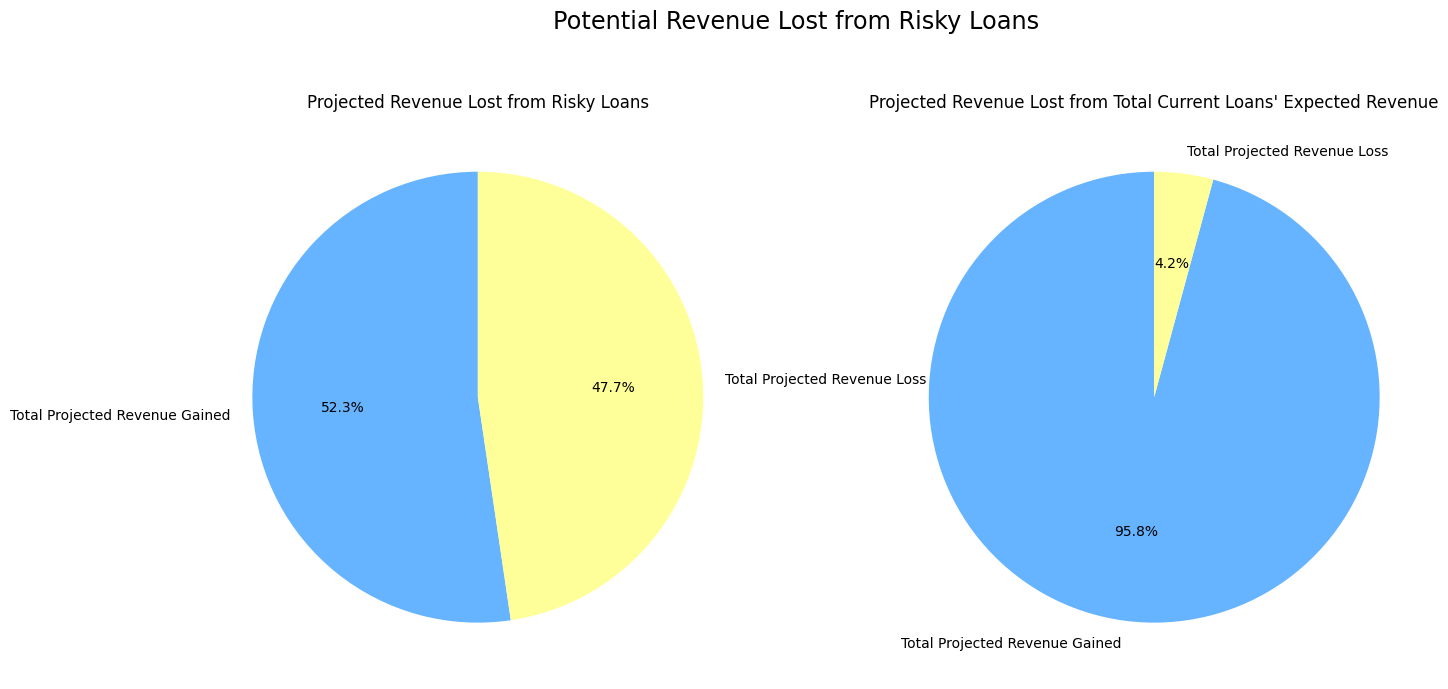

In [15]:

risky_projected_revenue_lost = query.revenue_lost_by_month(risky_df) # Calculating cumulative revenue lost for each month in a list.
risky_total_revenue_lost = risky_projected_revenue_lost[-1] # Total revenue lost from risky loans.
risky_total_expected_revenue = query.calculate_total_expected_revenue(risky_df) # Expected total revenue from all risky loans, if paid fully.
current_total_expected_revenue = current_df['total_payment'].sum() #  Total expected revenue from currently active loans.

print(f"\nIf 'Risky' loans were 'Charged Off' the company would expect to lose {round(risky_total_revenue_lost,2)} amount of revenue.")

# Setting up parameters for visualisation:
label = ['Total Projected Revenue Gained', 'Total Projected Revenue Loss']
variables_1 = [risky_total_expected_revenue-risky_total_revenue_lost, risky_total_revenue_lost]
variables_2 = [current_total_expected_revenue-risky_total_revenue_lost, risky_total_revenue_lost]
title = 'Potential Revenue Lost from Risky Loans'
title_1 = 'Projected Revenue Lost from Risky Loans'
title_2 = "Projected Revenue Lost from Total Current Loans' Expected Revenue"

# Generating visualisation:
visual.two_pie_charts(labels_1=label, sizes_1=variables_1, labels_2=label, sizes_2=variables_2, title_1=title_1, title_2=title_2, plot_title=title)

The potential loss from 'Risky' loans becoming 'Charged Off' is around 9 million loss in revenue. This represents roughly half of all Revenue that these loans would have been expected to generate. This also represents just over 4 % of all total revenue expected to be generated from all currently active loans. We can also consider the percentage of revenue that was lost to loans that were defaulted.

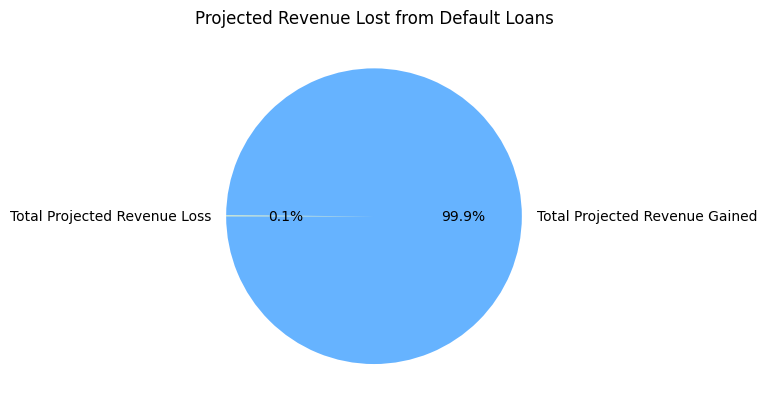

In [16]:
default_df = df[df['loan_status']=='Default'] # A dataframe that contains only loans that were defaulted.
default_projected_revenue_lost = query.revenue_lost_by_month(default_df) # Calculating cumulative revenue lost for each month in a list.
default_total_revenue_lost = default_projected_revenue_lost[-1] # Total revenue lost from defaulted loans

# Setting up parameters for visualisation:
variables_3 = [total_expected_revenue-default_total_revenue_lost, default_total_revenue_lost]
title_3 = 'Projected Revenue Lost from Default Loans'

# Generating Visualisation:
visual.pie_chart(labels=label, sizes=variables_3, title=title_3)

defaulted loans have lost a much smaller share of total expected revenue than the potential loss from risky loans would, at around 0.1 %. This means the current risky loans should not be ignored.

### Indicators of Loss

The first stage of understanding factors which influence the risk of loss for a loan. The following variables were identified as potential risk factors:

**Discrete Columns**:
- 'grade'
- 'term'
- 'employment_length'
- 'home_ownership'
- 'purpose'

**Continuous Columns**:
- 'annual_inc'
- 'int_rate'
- 'loan_amount'
- 'instalment'
- 'dti'

To start with, the discrete variables should be compared between subsets of the loan customers, we can compare between all loans; fully paid of loans which indicate succesful loans; charged and defaulted loans, which indicate unsuccesful loans and currently risky loans which can be compared to see if there are any patterns amongst customers who are behind on payments. By looking at all this we can get a clearer picture of what a risky loan looks like. To compare we can use pie charts and bar plots to gain a greater understanding of what the probability of the category is in each subset.

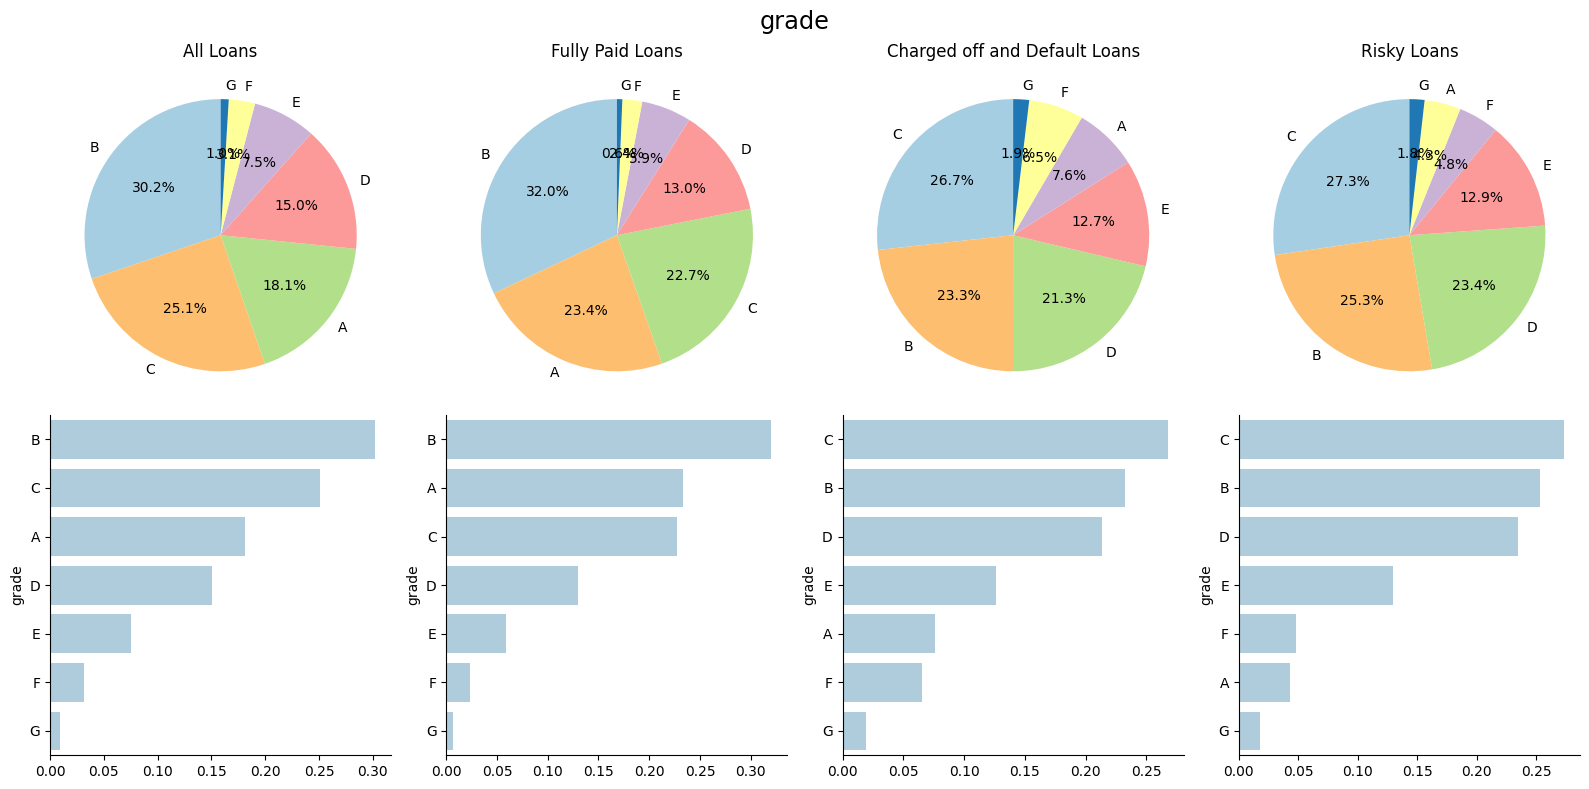

In [17]:
visual.discrete_value_risk_comparison(df, 'grade')

From the 'grade' column it can be noted that in general grade 'B' is the most common in the average and fully paid off loan, however in riskier and unsucceful loans, 'C' happens to be the most common grade. Furthermore it can be noted that grade 'D' and 'E' is also a bit more prevelant in risky and unsuccesful loans compared to otherwise. But perhaps the most noteworthy conclusion is that grade 'A' loans are very safe since the appear most in succefully paid off loans and have around 20 % probability in general, however in risky and unsuccesful loans, this drops to around 5 %, indicating grade 'A' loans are unlikely to be charged off or defaulted. From this data the key conclusions that can be drawn are that grade 'C', 'D' and 'E' loans should be more carefully considered and grade 'A' loans are very safe.

Next we can consider how the 'term' of the loan may have an impact on the risk of loss.

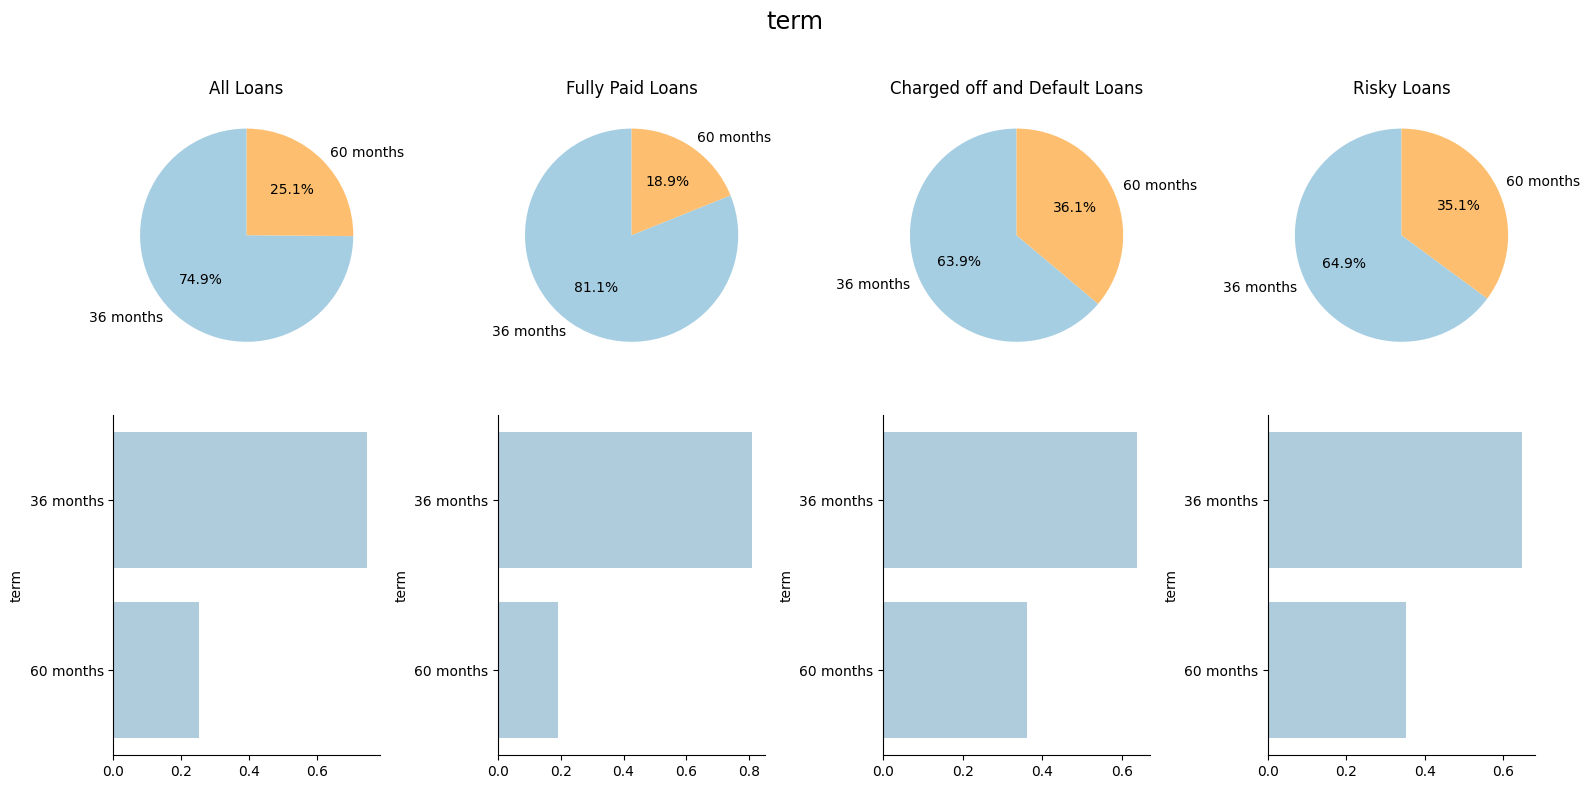

In [18]:
visual.discrete_value_risk_comparison(df, 'term')

From this data we can determine that althogh '36 month' terms in all cases are the most common, '60 month' terms have a significantly higher chance of becoming a risky or unsucceful loan (over 50 % increase in number o unsuccesful compared to succesful '60 month' term loans), almost 15 % more loans are '60 month' terms in the unsuccesful categories. Therefore '60 month' terms should be issues with more caution.

We can now have a look at whether employment length has an impact on risk of loan.

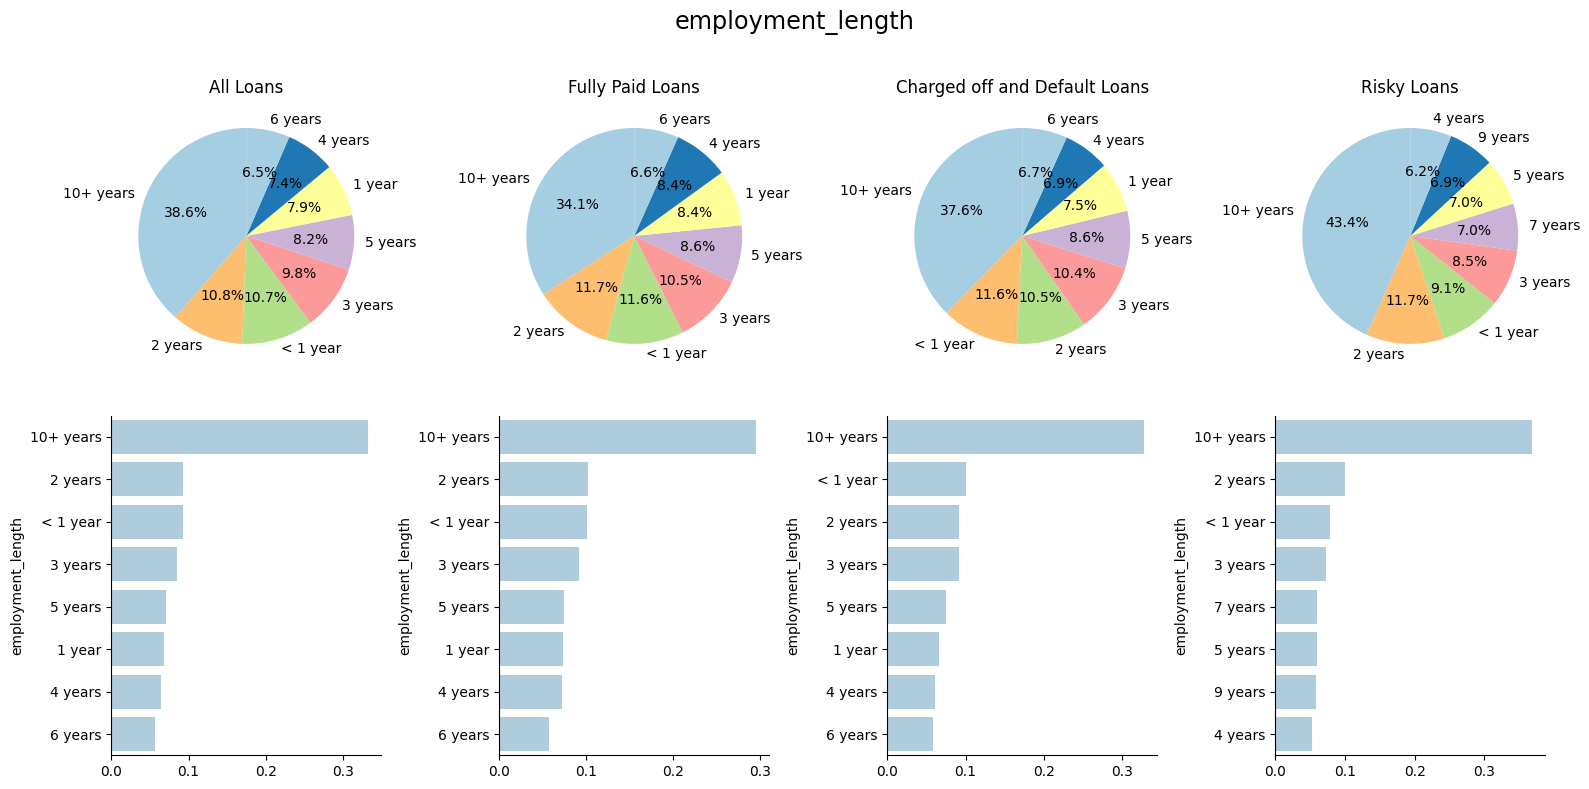

In [19]:
visual.discrete_value_risk_comparison(df, 'employment_length')

'employment length' does not have a significant impact on risk of loan, '10+ years' is disproportionatly more prevelant in all categories but this is because it also represents a much larger range of years than the other categories. It could be slightly noted that if you ignore the '10+ years' category, that there is a very weak trend for lower employment lengths to be slightly more likely to have more prevelance in unsuccesful loans, but this can be considered statistically insignificant since this trend is very weak and can be somewhat seen in all subsets of the data.

'home_ownership' may also have a relationship with the probability of loss from a loan, as shown below.

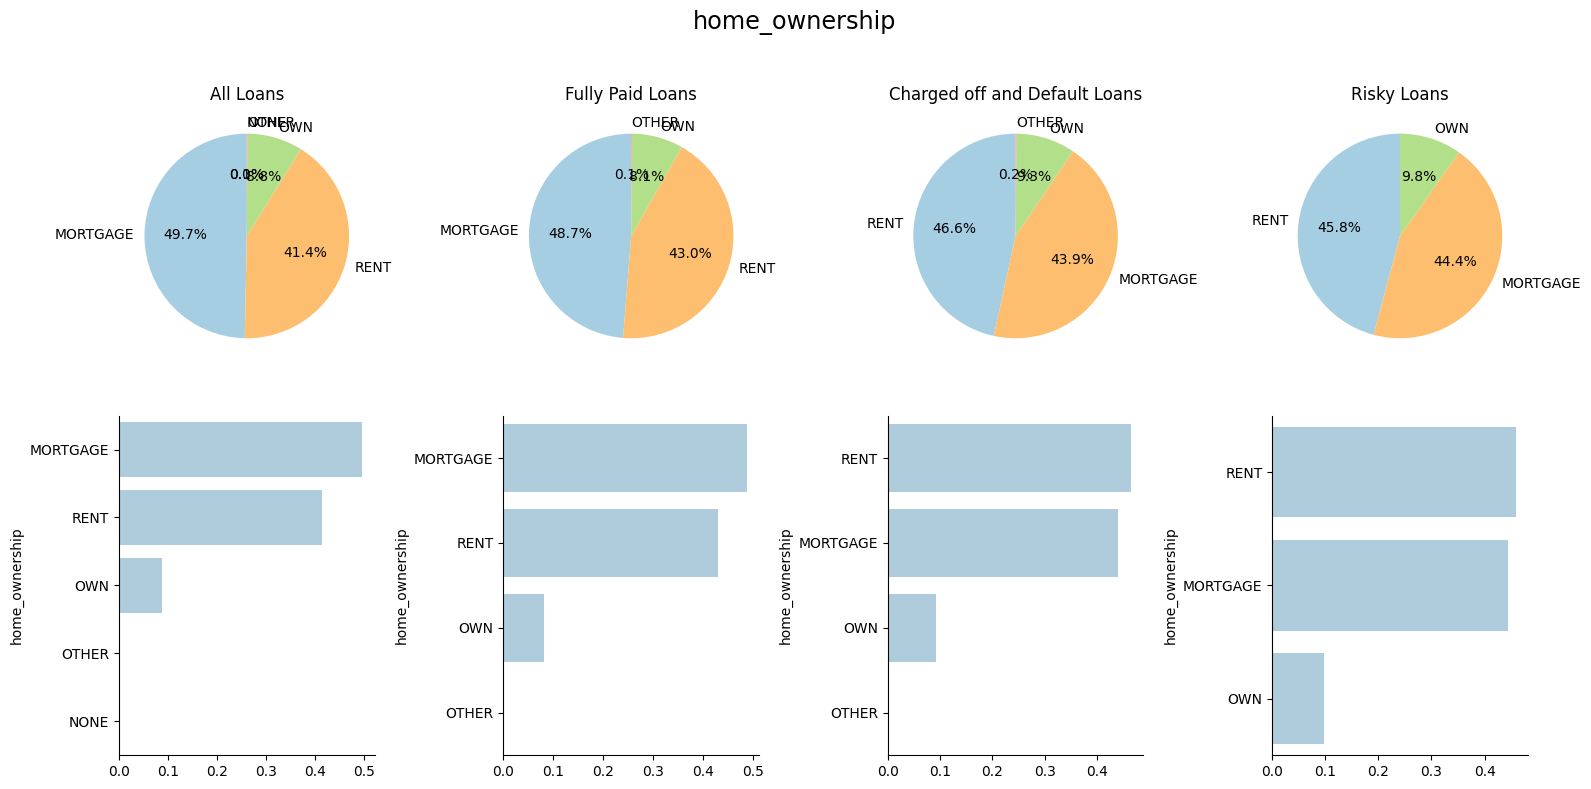

In [20]:
visual.discrete_value_risk_comparison(df, 'home_ownership')

The most evident conclusion from this visualisation is that succesfully paid loans are more likely to be from customers with mortgages and unsuccesful and risky loans are more likely to be from customers that rent. renters make up roughly 3.5 % more of unsuccesful loans than succesful loans. customers that own their homes do not vary among the subsets of loans. This suggests that loans to renters should be issues with slightly more caution.

The final discrete column that can be analysed is the 'purpose' of the loan.

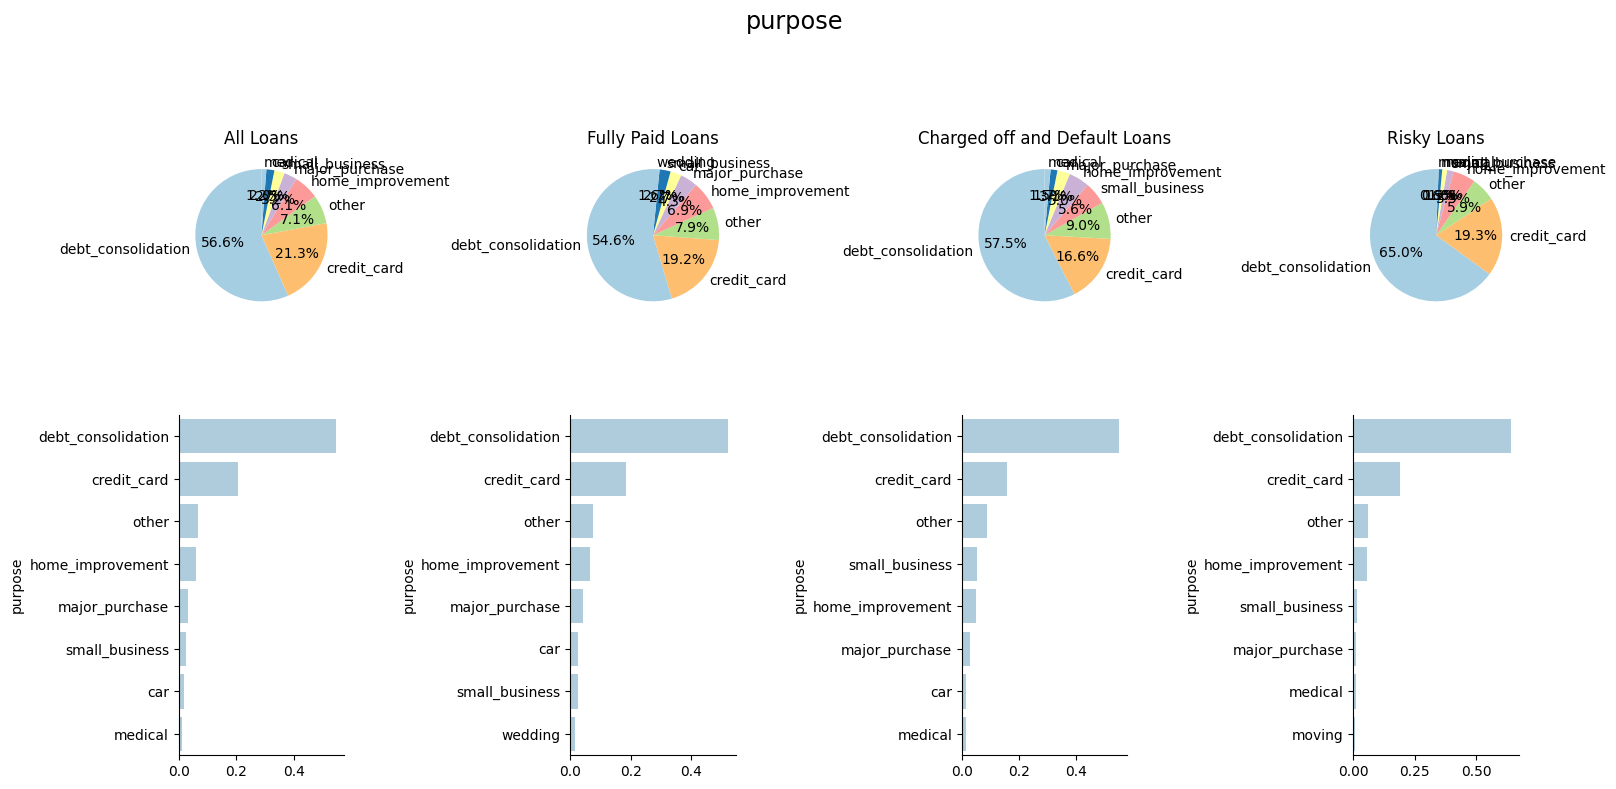

In [21]:
visual.discrete_value_risk_comparison(df, 'purpose')

debt consolidation makes up a majority of the purpose for all loans, debt consolidation is significantly more likely to be a loan purpose for loans that are behind on payments or in the 'risky' subset. small business loans are also slightly more likely to be charged off or defaulted loans than other subsets. From this it can be stated that debt consolidation loans, although the majority, should still be observed and monitored carefully since they are more likely to be behind on payments, perhaps policies should be reviewed for loans issued for debt consolidation.

Now we can look at any trends or patterns in continuous data that highlight any variables that impact the risk of loss from a loan. For this analysis, a histogram and a violin plot will be analysed, to identify factors such as distribution and mean to understand any trends in specific subsets of loans. The first continuous variable that will be analysed is 'annual_inc'. 

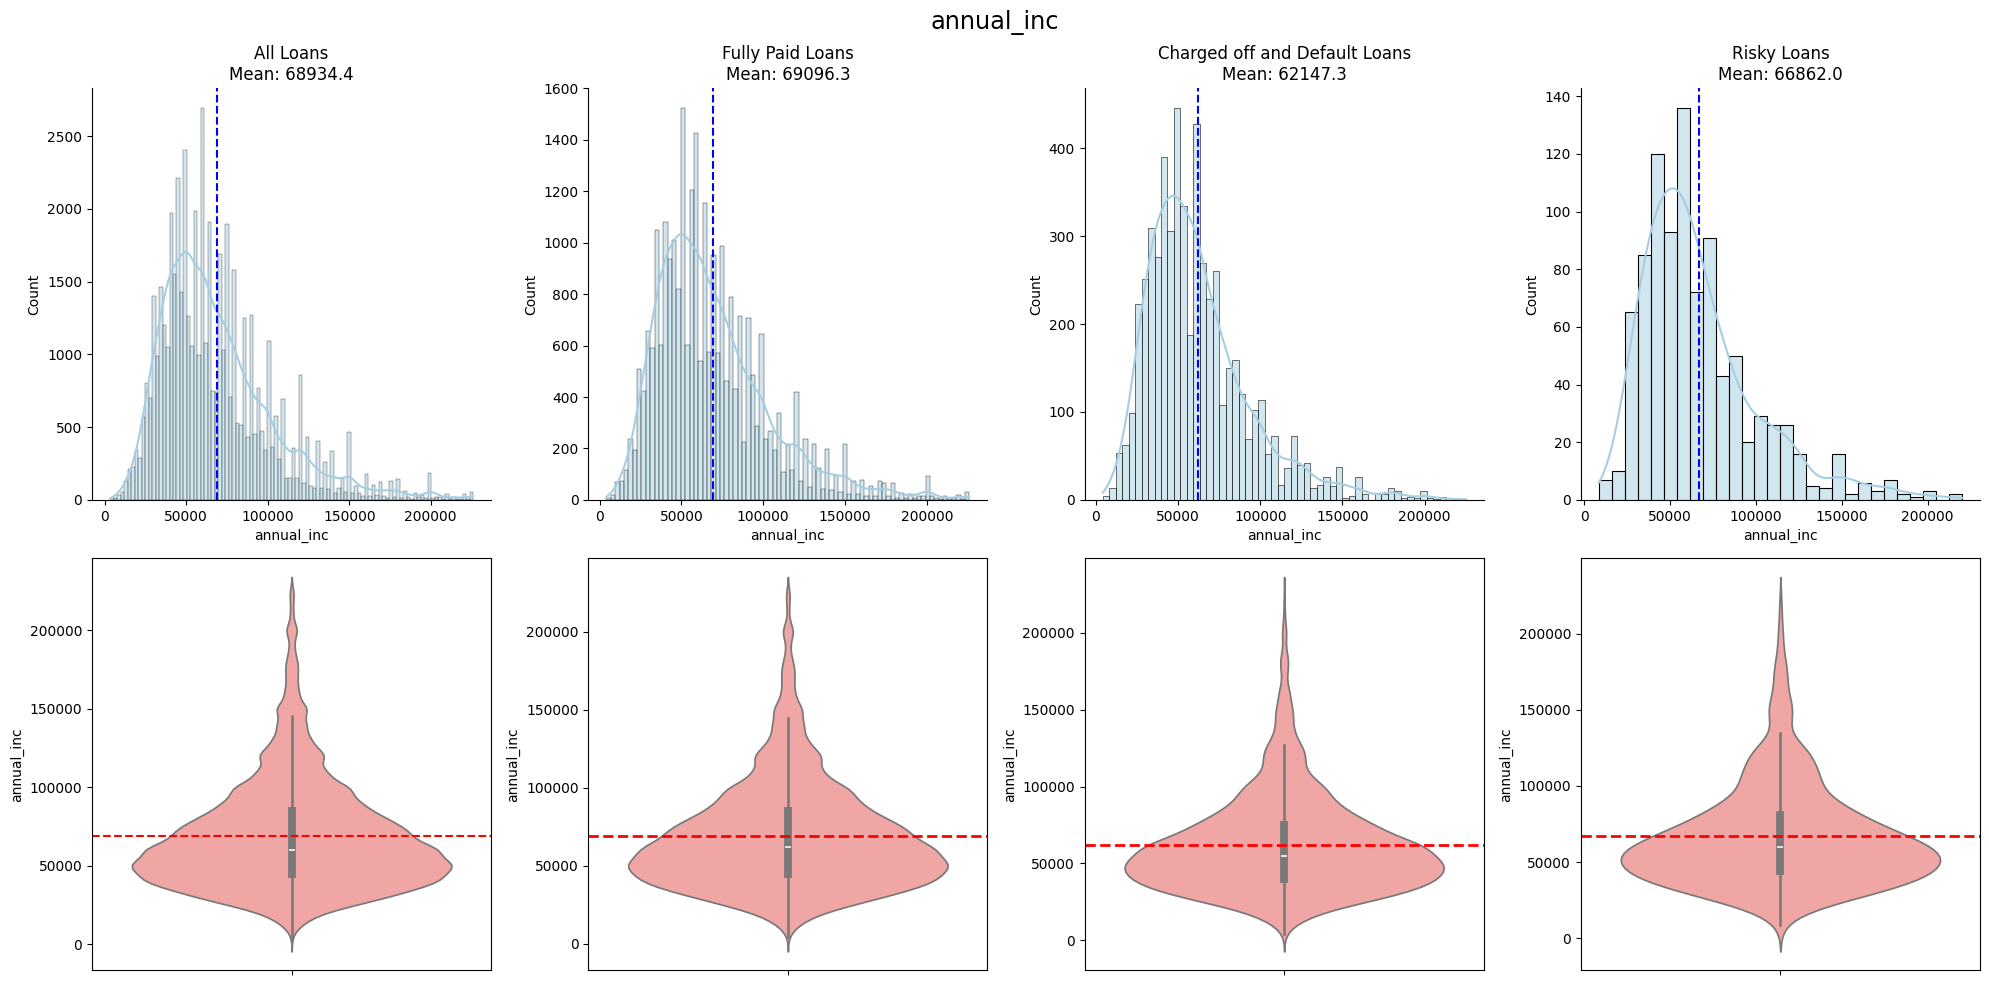

In [22]:
visual.continuous_value_risk_comparison(df, 'annual_inc')

from the annual income visualisation, it can be noted that unsuccesful loans have 10 % lower average income than succesful and general loans. Risky loans, where people are behind on payments also have a slightly lower average income than other subsets. The violin plots also show a very small increase in frequencies at higher incomes. This highlights that the higher the income, generally there is less risk of the loan not being paid.

Next we can look at whether the loan interest rate has an impact on loan risk.

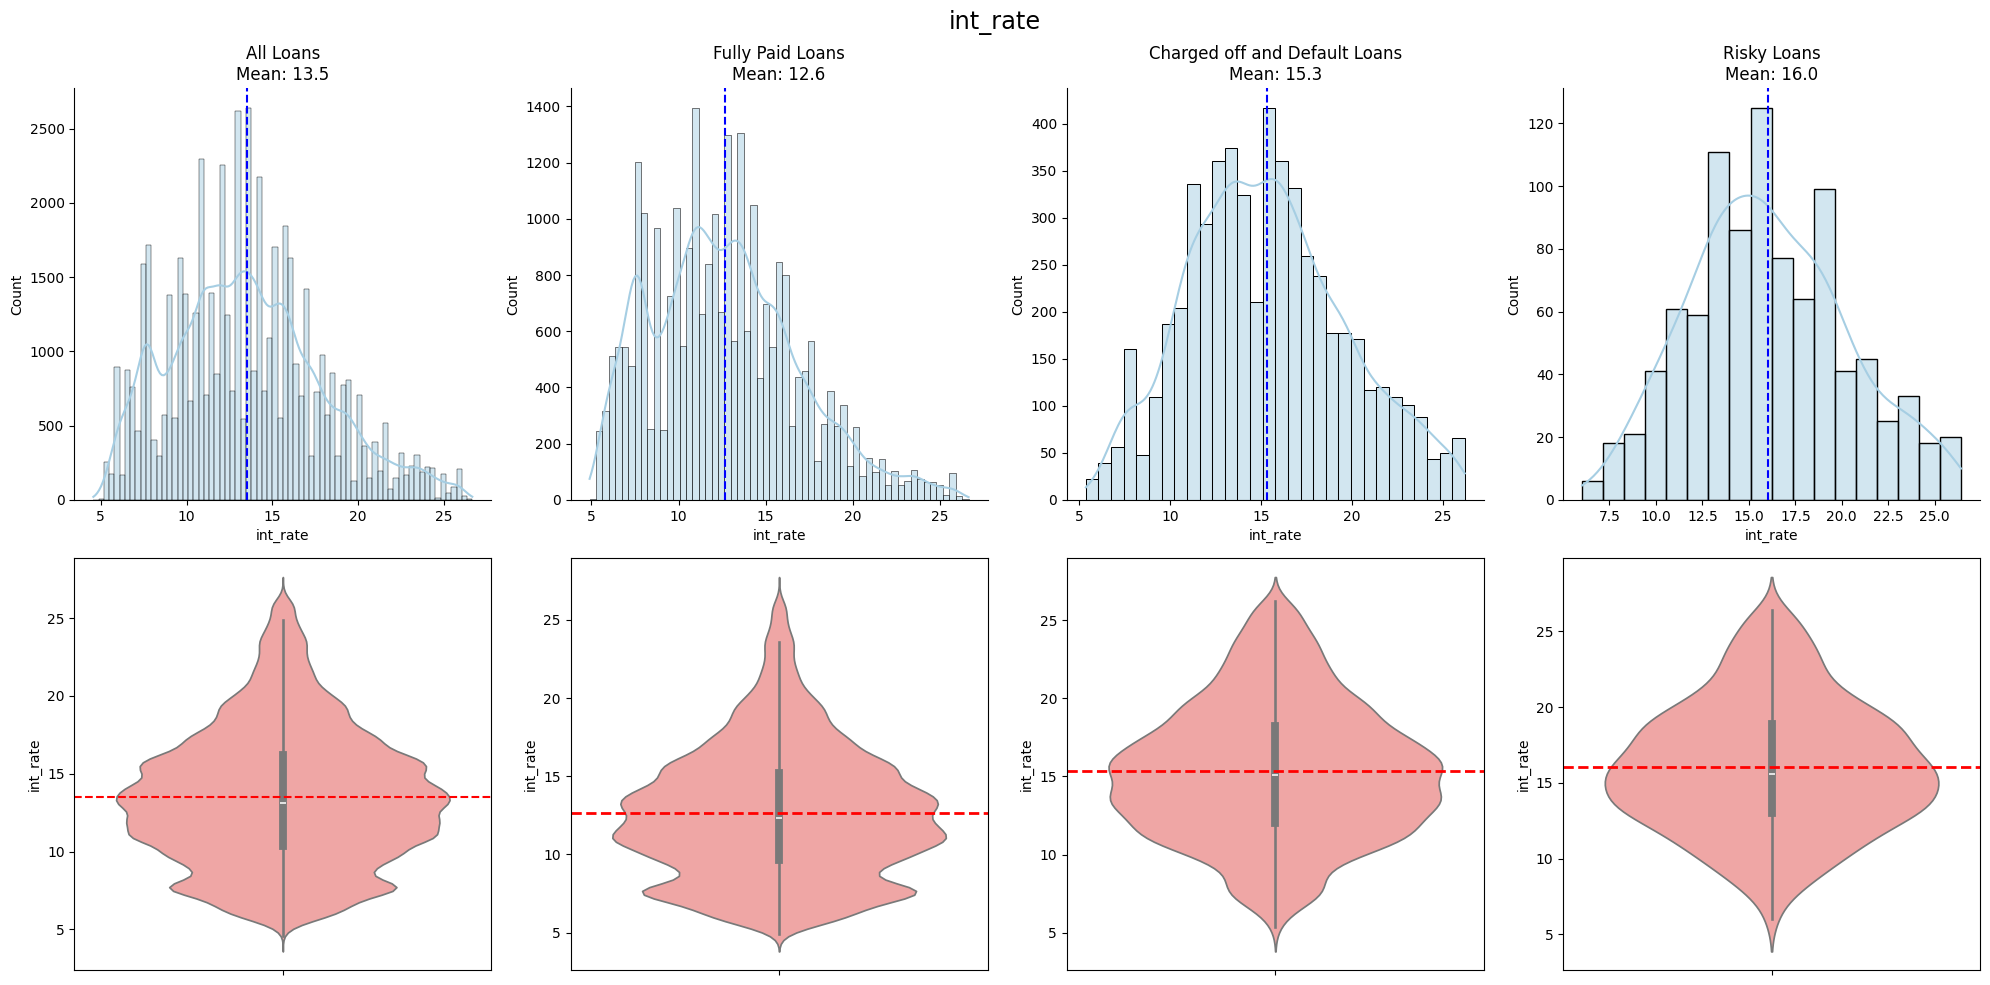

In [23]:
visual.continuous_value_risk_comparison(df, 'int_rate')

There is a clear distinction between the plots for general and succesful loans and that of unsuccesful or delayed payment loans, the data is more positively skewed for lower interest rates in general and succesful loans (which have an even more pronouced skewness in fully paid loans), even a lower average interest rate of 12 % to 13 %. There is also from the violin plots a much higher frequency at lower interest rates. For unsuccesful and risky loans, higher interest rates show a greater frequency from the violin plots and the data is less skewed, with the mean centred at higher values of 15 % to 16 %. This data clearly suggests that higher interest rates have a much greater risk of not being paid. Succesfully paid off loans also tend to be those that are at a lower interest rate than the average loan.

Next we can consider whether the amount of loan issued has any relationship to the risk of default, being charged off or delayed.

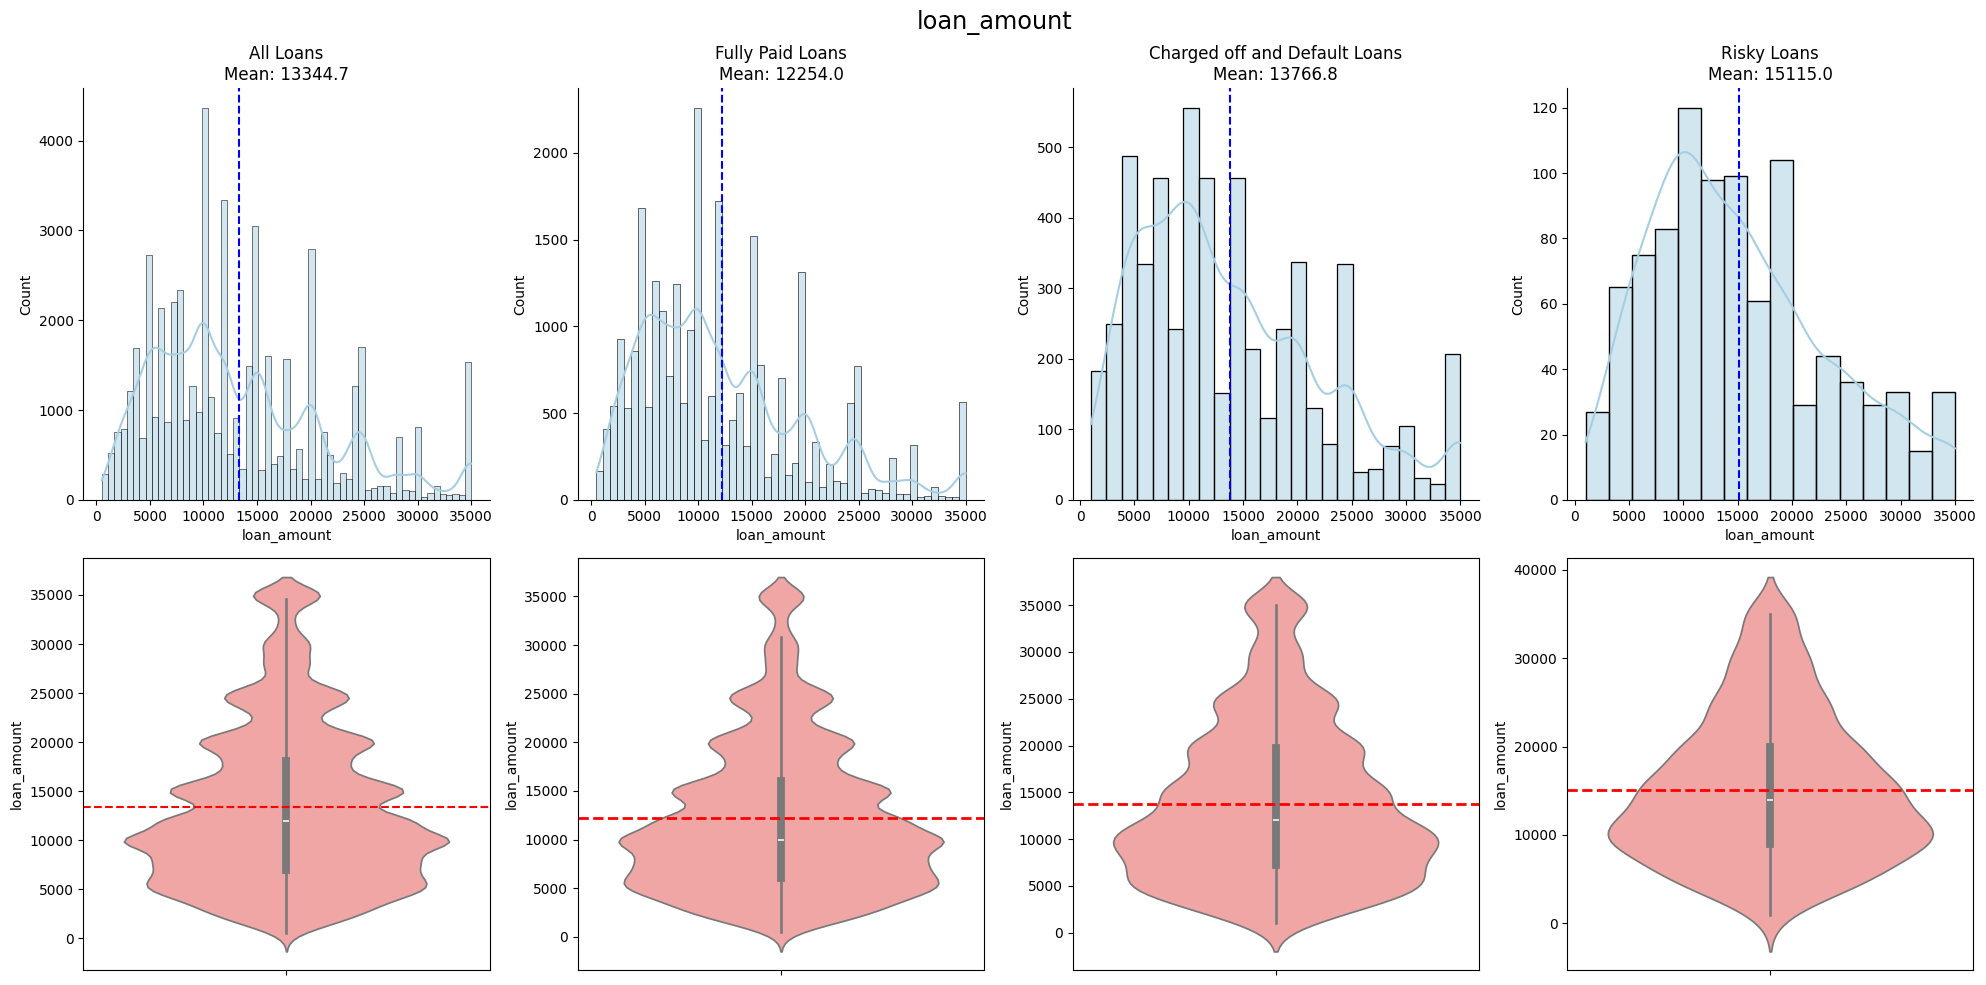

In [24]:
visual.continuous_value_risk_comparison(df, 'loan_amount')

All loan amount data is slightly positive skewed, however in charged off and defaulted loans, as well as even more so in delayed payment loans, there are greater frequencies of loans at the higher values, as can be seen from the violin plot. Also the unsuccesful and riskier loans have a higher mean value, of 14k to 15k, than the general and succesful loans. It can also be seen that succesfully paid off loans have an evern lower average value than the average loan. This follows a similar pattern to interest rates where it can be concluded that lower loan amounts pose less risk.

Now we can take a look at whether the value of monthly instalment impacts the level of loan risk.

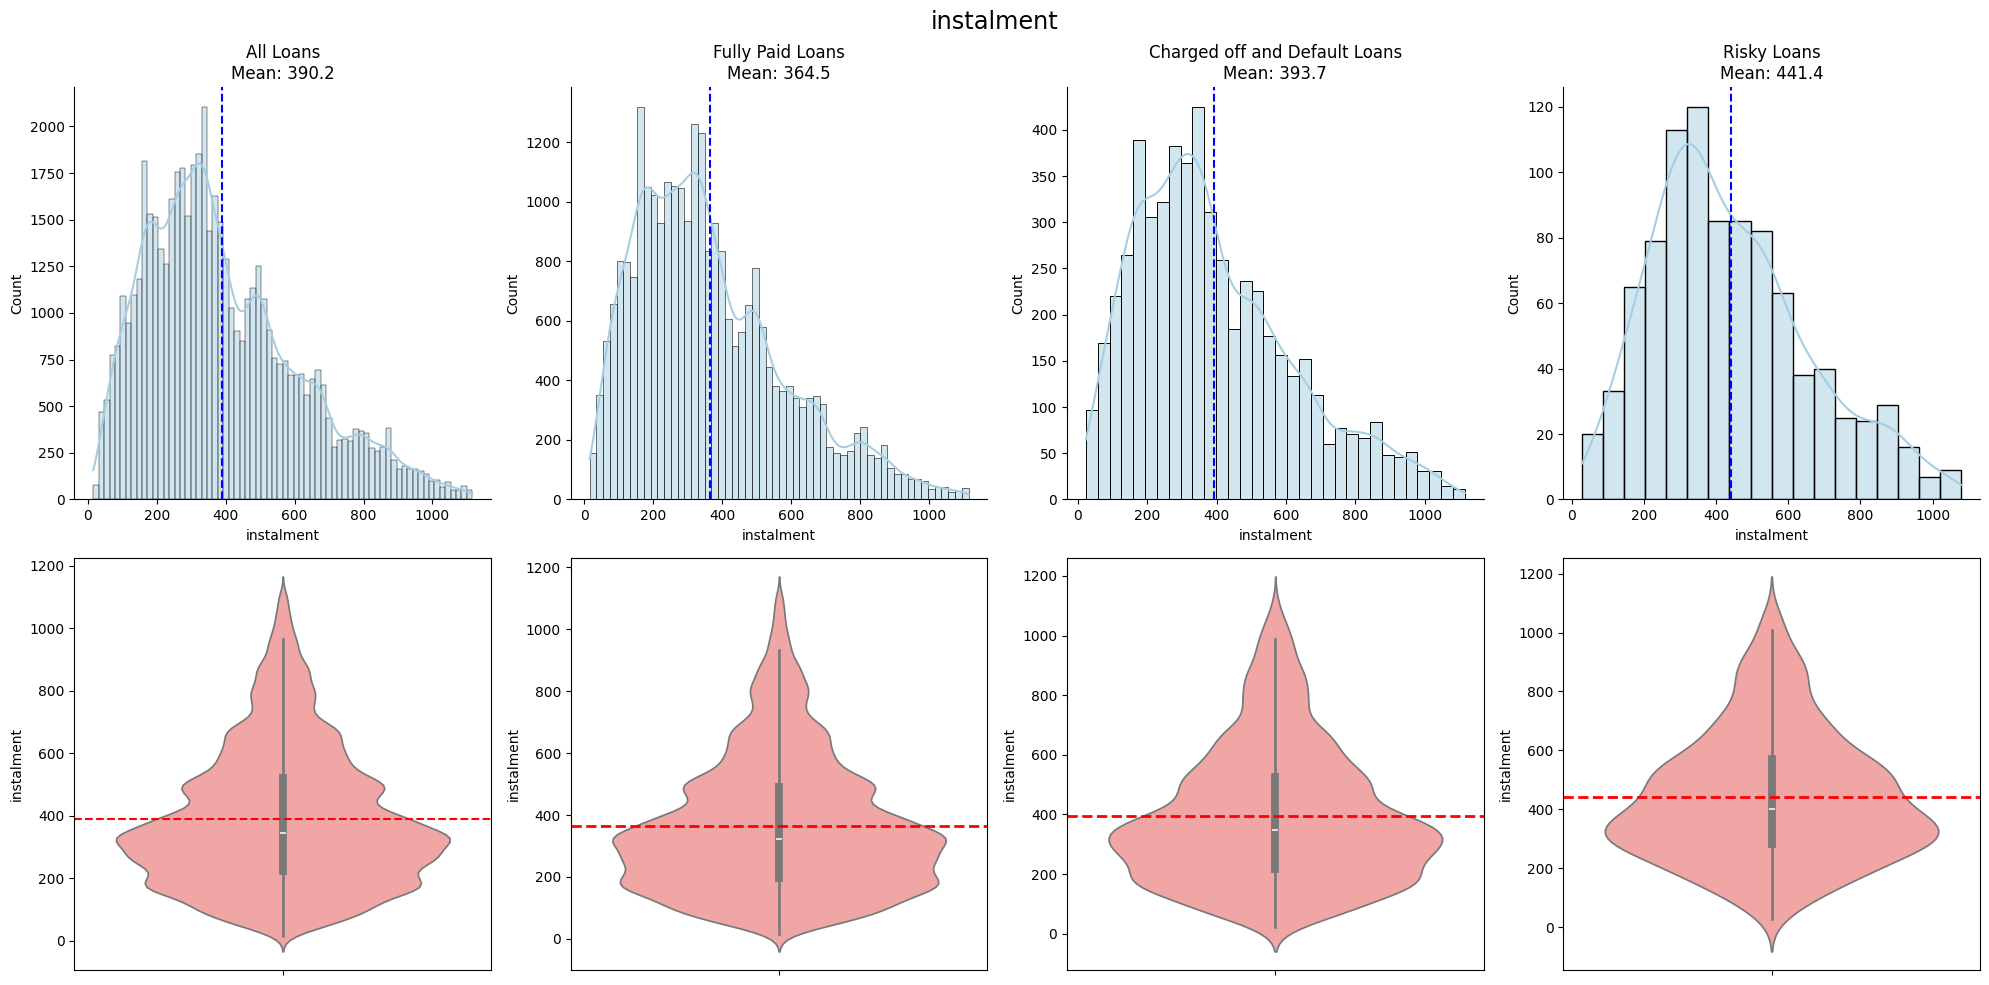

In [28]:
visual.continuous_value_risk_comparison(df, 'instalment')

Again the data shows positive skew, particularly for general and paid off loans, which also in the violin plot can be seen that delayed risky loans have slightly higher frequencies at larger monthly instalments. A similar trend to other variables can be seen here where unsuccesful loans have a higher average monthly amount (393) and succesfully paid off have a significantly lower monthly amount (360), loans that are currently behind on payments have a statistically significantly higher average monthly instalment of 440. This suggests that higher monthly instalments have a higher risk of being behind on payments, charged off or defaulted.

The final variable that could have an effect on risk of loss is 'dti' or debt-to-income ratio.

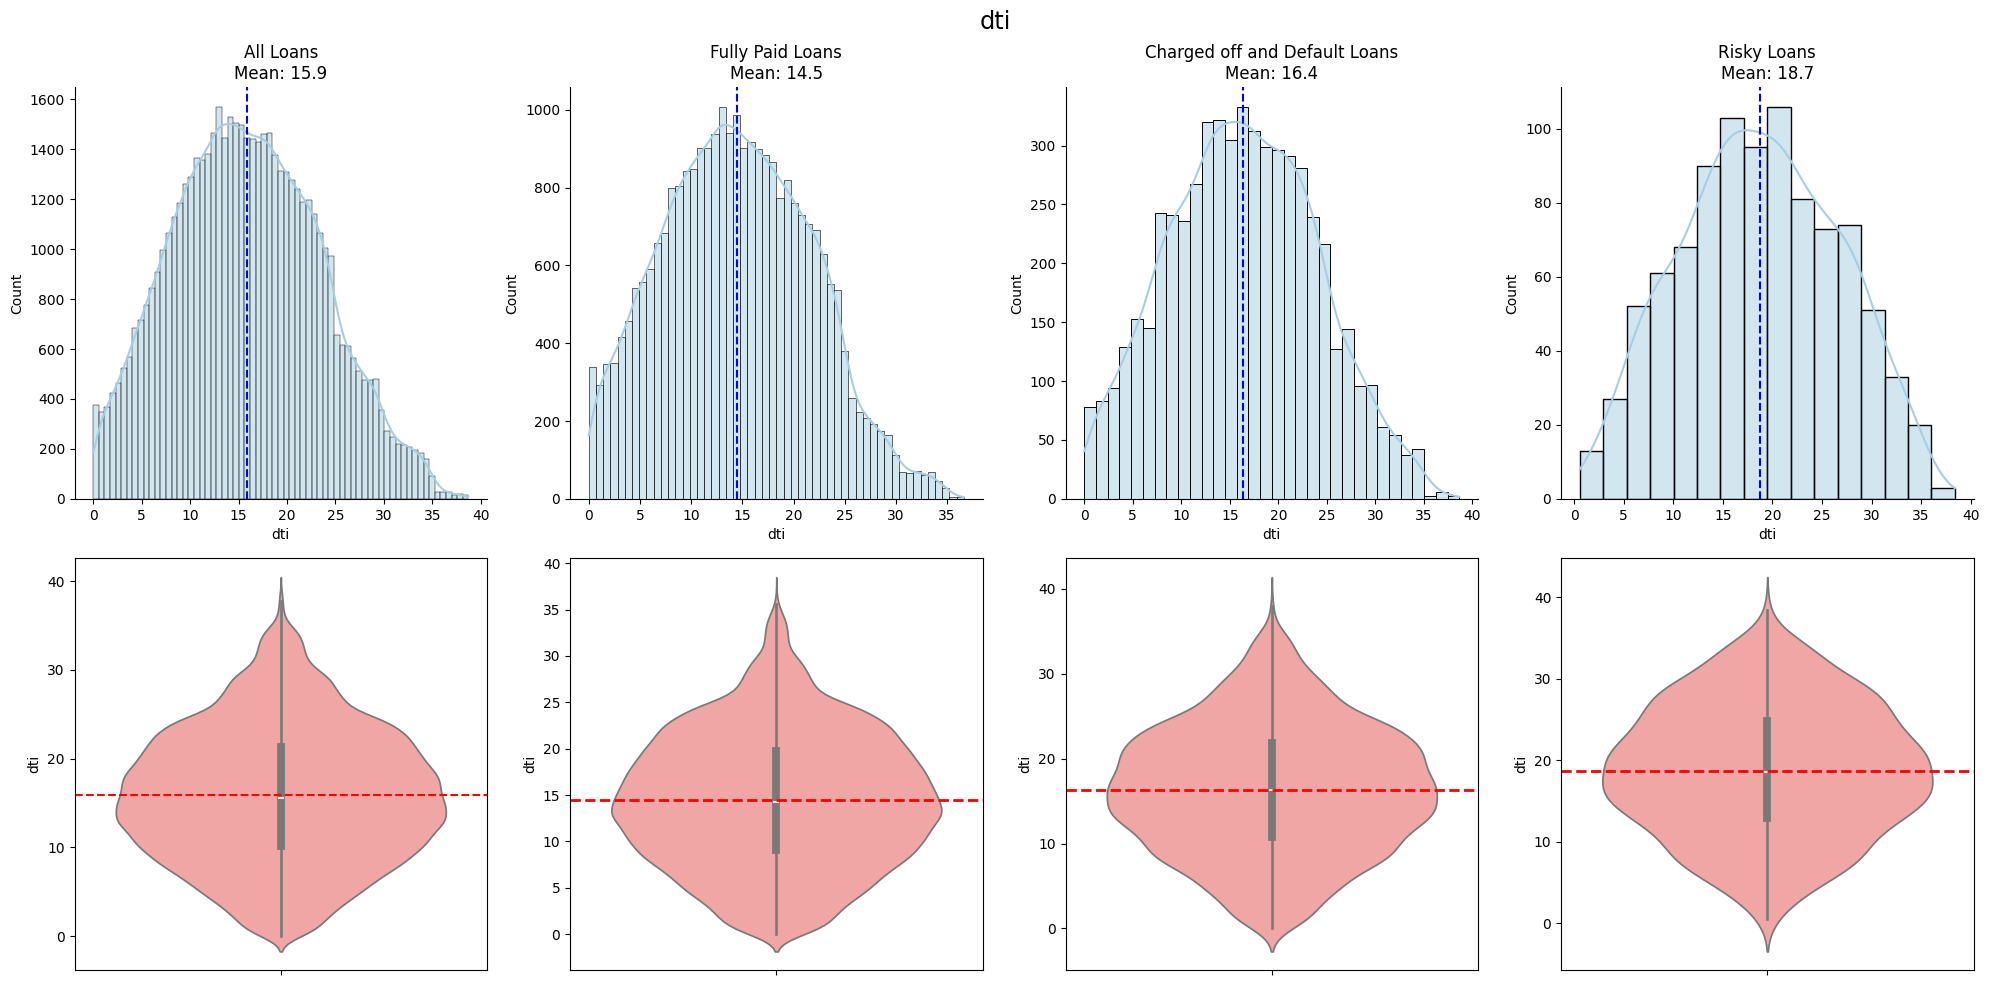

In [30]:
visual.continuous_value_risk_comparison(df, 'dti')

This visualisation follows the expected trend, risky loans have roughly half a standard deviation higher dti than the average loan. the average dti for someone behind on payments is roughly 19, whereas for the average loan it is 16. Succesfully paid off loans have an average dti of 15 which suggests the lower the dti the less risk. This is further supported by the average dti for charged off or defaulted loans being slightly higher than the average loan and being 2 units higher than the sucesfully paid off loans. The violin plots also indicate higher frequencies of loans at higher dti's for unsuccesful loans and especially for risky loans than the average and succesfully paid off loans which has the lowest frequencies at high dtis. Generally the histograms are quite normally distributed but for fully paid off loans there is slight positive skewing, even a lower maximum dti, indicating that lower dti customers are more likely to fully pay off their loans. This suggests that the higher the dti, the more caution should be exercised when issuing the loan.

### Conclusion

From the data analysis and visualisation it was discovered that the company faces a loss from loans that are not recovered, especially 'Charged Off' loans. Revenue over the next 6 months was also able to projected if all current loans are collected, considering the potential loss that the company faces from current risky loans. This visualisations also identified key variables such as the grade of the loan, income and dti of the customer and policy terms that can be used as indicators of loss, this information can be used to review and update the loan issuing and policy making process to minimise the loss to the company from unsuccesfully paid and risky loans.

Key insights:

- 90 % of all funded amounts have been recovered.
- Collections over the next 6 months will recover 18 % of all loans and 120 % of currently outstanding loan amounts (cover all currently outsanding funds).
- 1 in every 10 loans is 'Charged Off'.
- under 50 % of 'Charged Off' loan funds issued were recovered, if these loans had been fully paid then they would have generated 70 million additional revenue.
- 5 % of current loans are deemed 'Risky' or behind on payments, which has a potential loss of 9 million.
- Grade 'A' loans are safest, grade 'D' and 'E' should be issued with caution.
- 60 month terms are riskier than average.
- Renters pose slightly greater risk than mortgage payers.
- 'Charged Off' and 'Defaulted' loan customers have a 10 % lower average income than fully paid off loans.
- The lower the interest rates, loan amounts and monthly instalment amounts, the lower the risk of loss.
- 'Dti' is positively correlated with risk of loss.

These insights provide a clearer picture of which loans should be issued with stricter conditions and more caution and which customers can be deemed more reliable to pay back the loans. Further analysis can be done by considering the following:

- How indicators of risk vary across time and can be used to understand patterns of risk.
- Applying machine learning to predict the risk of current loans and future loans by varying parameters such as customer income, loan amount and interest rate amongst others to help issue safer loans.
- Deeper exploration into reasons behind these patterns and causes of risk. 